# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)

6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import numpy as np
import pandas as pd
from keras import models
from keras import layers

In [2]:
# data load from local folder (same as the python file)

In [3]:
data = pd.read_csv('CarPrice_Assignment.csv')
#data.drop(labels=['car_ID'], axis=1, inplace=True)
# shuffle the DataFrame rows 
data = data.sample(frac = 1) 
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
123,124,-1,plymouth valiant,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921.0
59,60,1,mazda 626,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845.0
122,123,1,plymouth fury gran sedan,gas,std,four,sedan,fwd,front,93.7,...,98,2bbl,2.97,3.23,9.4,68,5500,31,38,7609.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,47,2,isuzu D-Max,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0
149,150,0,subaru dl,gas,turbo,four,wagon,4wd,front,96.9,...,108,mpfi,3.62,2.64,7.7,111,4800,23,23,11694.0
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0


In [4]:
# checking for the missing values

In [5]:
# there is no missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 4 to 51
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 17

In [6]:
# label encoding for non-numeric labels using Label Encoder

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['CarName']        = labelencoder.fit_transform(data['CarName'])
data['fueltype']       = labelencoder.fit_transform(data['fueltype'])
data['aspiration']     = labelencoder.fit_transform(data['aspiration'])
data['carbody']        = labelencoder.fit_transform(data['carbody'])
data['drivewheel']     = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem']     = labelencoder.fit_transform(data['enginelocation'])
data['enginetype']     = labelencoder.fit_transform(data['enginetype'])
data['cylindernumber'] = labelencoder.fit_transform(data['cylindernumber'])

data['doornumber']     = data['doornumber'].map({'two':2.,'four':4.})   # separate encoding 

In [7]:
# verifying for label encoding
#data = data*1.
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
4,5,2,5,1,0,4.0,3,0,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
123,124,-1,94,1,0,4.0,4,1,0,103.3,...,122,0,3.35,3.46,8.5,88,5000,24,30,8921.0
59,60,1,53,1,0,2.0,2,1,0,98.8,...,122,0,3.39,3.39,8.6,84,4800,26,32,8845.0
122,123,1,91,1,0,4.0,3,1,0,93.7,...,98,0,2.97,3.23,9.4,68,5500,31,38,7609.0
201,202,-1,138,1,1,4.0,3,2,0,109.1,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0


In [8]:
data = (data).astype('float32')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
4,5.0,2.0,5.0,1.0,0.0,4.0,3.0,0.0,0.0,99.400002,...,136.0,0.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
123,124.0,-1.0,94.0,1.0,0.0,4.0,4.0,1.0,0.0,103.300003,...,122.0,0.0,3.35,3.46,8.5,88.0,5000.0,24.0,30.0,8921.0
59,60.0,1.0,53.0,1.0,0.0,2.0,2.0,1.0,0.0,98.800003,...,122.0,0.0,3.39,3.39,8.6,84.0,4800.0,26.0,32.0,8845.0
122,123.0,1.0,91.0,1.0,0.0,4.0,3.0,1.0,0.0,93.699997,...,98.0,0.0,2.97,3.23,9.4,68.0,5500.0,31.0,38.0,7609.0
201,202.0,-1.0,138.0,1.0,1.0,4.0,3.0,2.0,0.0,109.099998,...,141.0,0.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,47.0,2.0,45.0,1.0,0.0,2.0,2.0,2.0,0.0,96.000000,...,119.0,0.0,3.43,3.23,9.2,90.0,5000.0,24.0,29.0,11048.0
149,150.0,0.0,107.0,1.0,1.0,4.0,4.0,0.0,0.0,96.900002,...,108.0,0.0,3.62,2.64,7.7,111.0,4800.0,23.0,23.0,11694.0
15,16.0,0.0,13.0,1.0,0.0,4.0,3.0,2.0,0.0,103.500000,...,209.0,0.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,30760.0
16,17.0,0.0,14.0,1.0,0.0,2.0,3.0,2.0,0.0,103.500000,...,209.0,0.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,41315.0


In [9]:
x = (data.loc[:, data.columns != 'price'])
y = (data.loc[:, data.columns == 'price'])

In [10]:
from sklearn.preprocessing import MinMaxScaler # I used Minmax scaler -- using Std/Mean method gives very abnormal resluts.

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)
x.shape

(205, 25)

In [11]:
from sklearn.model_selection import train_test_split

# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.5  # 50%
ratio_val   = 0.2  # 20%
ratio_test  = 0.3  # 30%

# Produces 30% test split.
x_remaining, x_test, y_remaining, y_test = train_test_split(x, y, test_size=ratio_test, random_state=42)

# Adjusts val ratio, w.r.t. remaining dataset 
ratio_remaining = 1 - ratio_test   # (70% left).
ratio_val_adjusted = ratio_val / ratio_remaining  # 20% of 70%

# Produces train and val splits.
x_train, x_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size=ratio_val_adjusted)

In [12]:
#Normalizing the data.

#mean = x_train.mean(axis=0)
#x_train -= mean
#std = x_train.std(axis=0)
#x_train /= std

#x_val -= mean
#x_val /= std

#x_test -= mean
#x_test /= std

In [13]:
print(x_train.shape, x_val.shape, x_test.shape)  # verifying correct ratio distribution

(102, 25) (41, 25) (62, 25)


In [14]:
x_train.shape[1]

25

In [15]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(25, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [16]:
model=build_model()

history = model.fit(x_train, y_train, epochs=150, validation_data=(x_val, y_val))


Epoch 1/150
4/4 [==============================] - 1s 101ms/step - loss: 0.0954 - mae: 0.2369 - val_loss: 0.0875 - val_mae: 0.2035
Epoch 2/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0511 - mae: 0.1527 - val_loss: 0.0622 - val_mae: 0.1469
Epoch 3/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0433 - mae: 0.1255 - val_loss: 0.0555 - val_mae: 0.1363
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0350 - mae: 0.1125 - val_loss: 0.0510 - val_mae: 0.1313
Epoch 5/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0318 - mae: 0.1080 - val_loss: 0.0463 - val_mae: 0.1296
Epoch 6/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0302 - mae: 0.1137 - val_loss: 0.0414 - val_mae: 0.1284
Epoch 7/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0356 - mae: 0.1250 - val_loss: 0.0399 - val_mae: 0.1260
Epoch 8/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0256 - mae: 0.1

In [17]:
# evaluating

history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

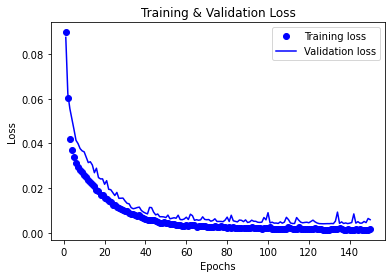

In [18]:
# evaluating validation loss

import matplotlib.pyplot as plt

history_dict=history.history
loss_value = history_dict['loss']
val_loss_value=history_dict['val_loss']
acc=history_dict['mae']   # missing in the book
val_acc=history_dict['val_mae']

epochs = np.arange(1, len(acc)+1)

plt.plot(epochs, loss_value, 'bo', label='Training loss')
plt.plot(epochs, val_loss_value, 'b', label='Validation loss')

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

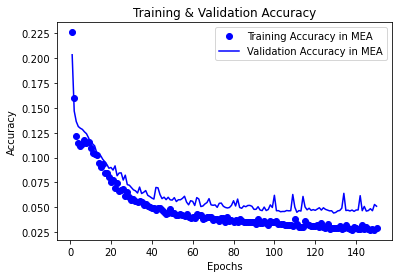

In [19]:
# evaluating validation accuracy

plt.plot(epochs, acc, 'bo', label='Training Accuracy in MEA')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy in MEA')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
# pridcting on test values

test_loss_score, test_accuracy_score = model.evaluate(x_test, y_test)

# display test loss
display(test_loss_score)

# display test predic 
display (test_accuracy_score)

2/2 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0514


0.004456444643437862

0.051399338990449905

In [21]:
# There is gap of approximately <4% in training and evaluation score. I assume it is acceptable
# Of there are few epochs, then the error becomes large.